#  Laboratory Task 1
## Machine Learning Technologies

**ITMO university. 1st semester**

Performed by: Gleb Mikloshevich

Group: J4132C

---

Course: MLT September

Lecturer: Petr Gladilin



In [1]:
!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostRegressor

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, log_loss, roc_curve, precision_recall_curve, f1_score


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/bioresponse.csv')

In [5]:
print(len(data))
data.head()

3751


Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...      0      0      0      0      0      0      0   
1  0.411754  0.836582  ...      1      1      1      1      0      1      0   
2  0.517720  0.679051  ...      0      0      0      0      0      0      0   
3  0.288764  0.805110  ...      0      0      0      0      0      0      0   
4  0.303809  0.812646  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1      0  
2      0      0      0  
3      0      0      0  
4      0      0      0  

[5 rows x 1777 columns]

In [6]:
data.describe()

Activity           D1           D2           D3           D4  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.542255     0.076948     0.592436     0.068142     0.038990   
std       0.498278     0.079989     0.105860     0.078414     0.115885   
min       0.000000     0.000000     0.282128     0.000000     0.000000   
25%       0.000000     0.033300     0.517811     0.000000     0.000000   
50%       1.000000     0.066700     0.585989     0.050000     0.000000   
75%       1.000000     0.100000     0.668395     0.100000     0.000000   
max       1.000000     1.000000     0.964381     0.950000     1.000000   

                D5           D6           D7           D8           D9  ...  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000  ...   
mean      0.212112     0.686653     0.274713     0.455133     0.749517  ...   
std       0.102592     0.078702     0.090017     0.162731     0.071702  ...   
min       0.002630     0.137873     0.006130     0.000000     0.275590  ...   
25%       0.138118     0.625627     0.207374     0.378062     0.707339  ...   
50%       0.190926     0.674037     0.277845     0.499942     0.738961  ...   
75%       0.261726     0.740663     0.335816     0.569962     0.788177  ...   
max       1.000000     0.994735     0.790831     0.989870     1.000000  ...   

             D1767        D1768        D1769        D1770        D1771  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.026926     0.014663     0.013863     0.021861     0.015196   
std       0.161889     0.120215     0.116938     0.146249     0.122348   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             D1772        D1773        D1774        D1775        D1776  
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000  
mean      0.016796     0.012263     0.011730     0.020261     0.011197  
std       0.128522     0.110074     0.107683     0.140911     0.105236  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 1777 columns]

In [7]:
print(pd.unique(data[['Activity', 'D1772', 'D1773']].values.ravel('K'))) # columns Activity, D1772, D1773 are binary

[1 0]


In [8]:
print(pd.unique(data[['D777']].values.ravel('K'))) # not binary, only 6 unique values

[0.         0.16666667 0.66666667 0.33333333 0.5        1.
 0.83333333]


Необходимо предсказать столбец Activity, который является бинарным.
Разделим данные на параметры и целевой показатель, потом на обучющую и тестовые выборки

In [9]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
print(f"Train data shape:{X_train.shape}")
print(f"Test data shape:{X_test.shape}")

Train data shape:(2813, 1776)
Test data shape:(938, 1776)


## Task 1, 2 and 3
1. Train 4 different classifiers using sklearn library to predict "Activity"

2. Calculate precision, recall, accuracy, f1-score and log-loss

3. Plot precision-recall and ROC curves for your models


As I tested before, scipy trees b-classificaion trees are basically a regression trees with 0.5 threshold.  

I did everything in one cell

In [12]:
classifiers = (DecisionTreeRegressor(max_depth=3, random_state=42), DecisionTreeRegressor(max_depth=40, random_state=42),
               RandomForestRegressor(max_depth=3), RandomForestRegressor(max_depth=40))
classifier_titles = ("Decision Tree", "Deep Decision Tree", "Random Forest(small trees) ", "Random Forest (Deep Trees)")


 --- DecisionTreeRegressor(max_depth=3, random_state=42) ---
Precision: 0.79
Recall: 0.80
Accuracy: 0.76
F1-score: 0.79
Log-loss score: 0.54
ROC AUC: 0.78


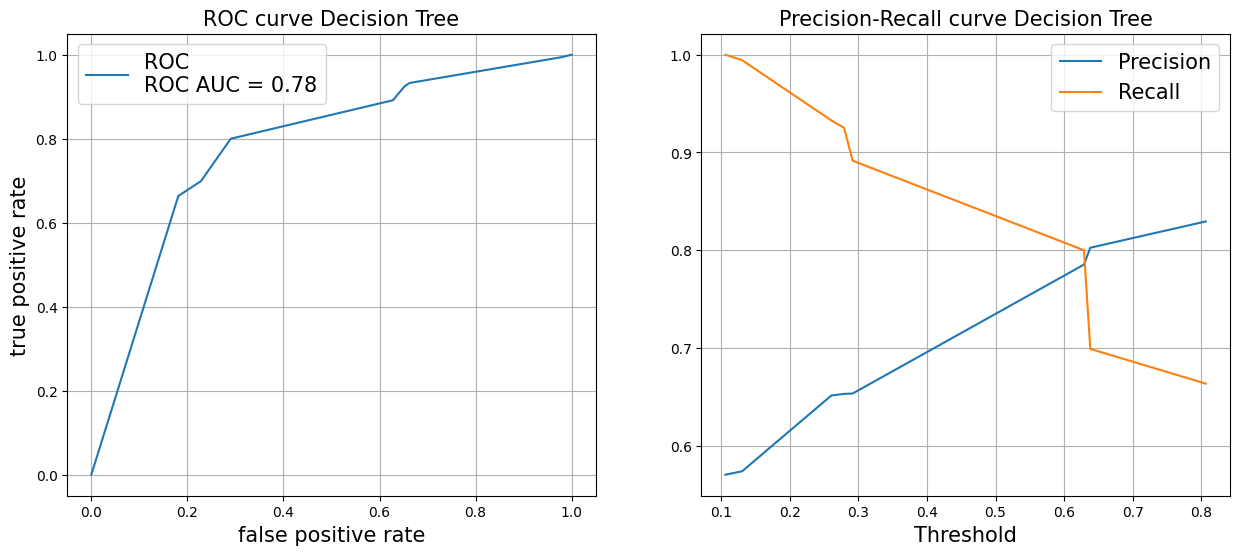




 --- DecisionTreeRegressor(max_depth=40, random_state=42) ---
Precision: 0.75
Recall: 0.72
Accuracy: 0.70
F1-score: 0.73
Log-loss score: 10.72
ROC AUC: 0.70


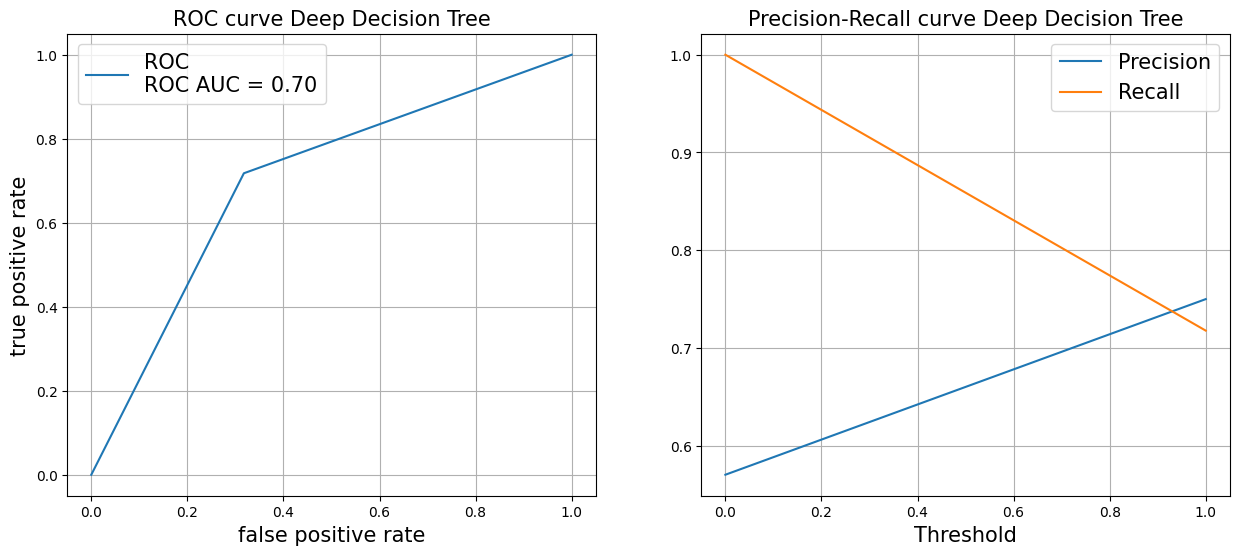




 --- RandomForestRegressor(max_depth=3) ---
Precision: 0.79
Recall: 0.82
Accuracy: 0.77
F1-score: 0.80
Log-loss score: 0.52
ROC AUC: 0.82


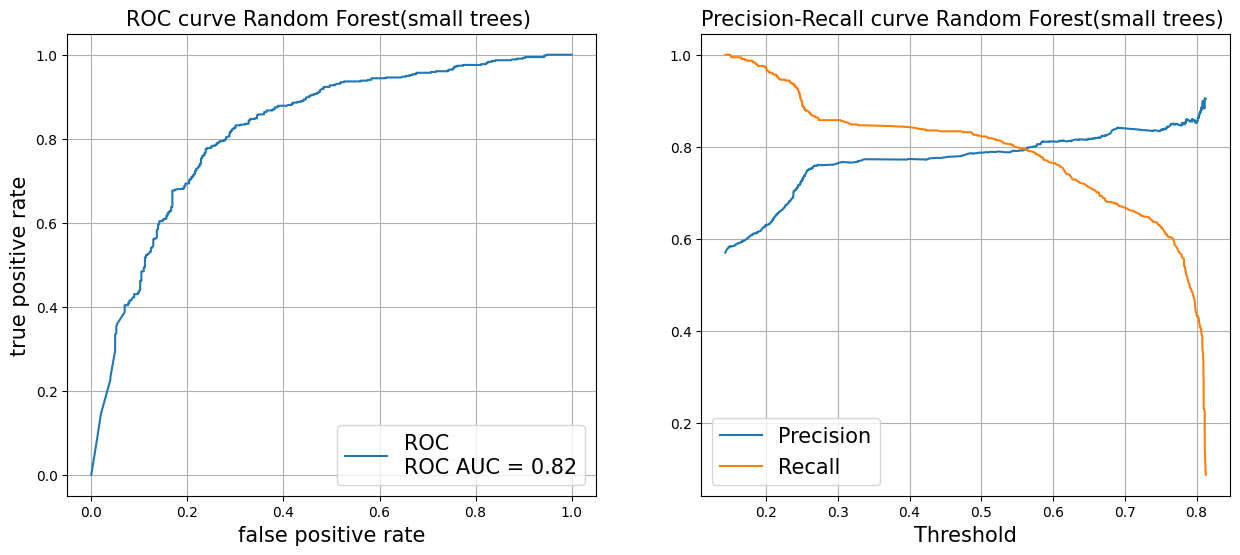




 --- RandomForestRegressor(max_depth=40) ---
Precision: 0.80
Recall: 0.82
Accuracy: 0.78
F1-score: 0.81
Log-loss score: 0.54
ROC AUC: 0.85


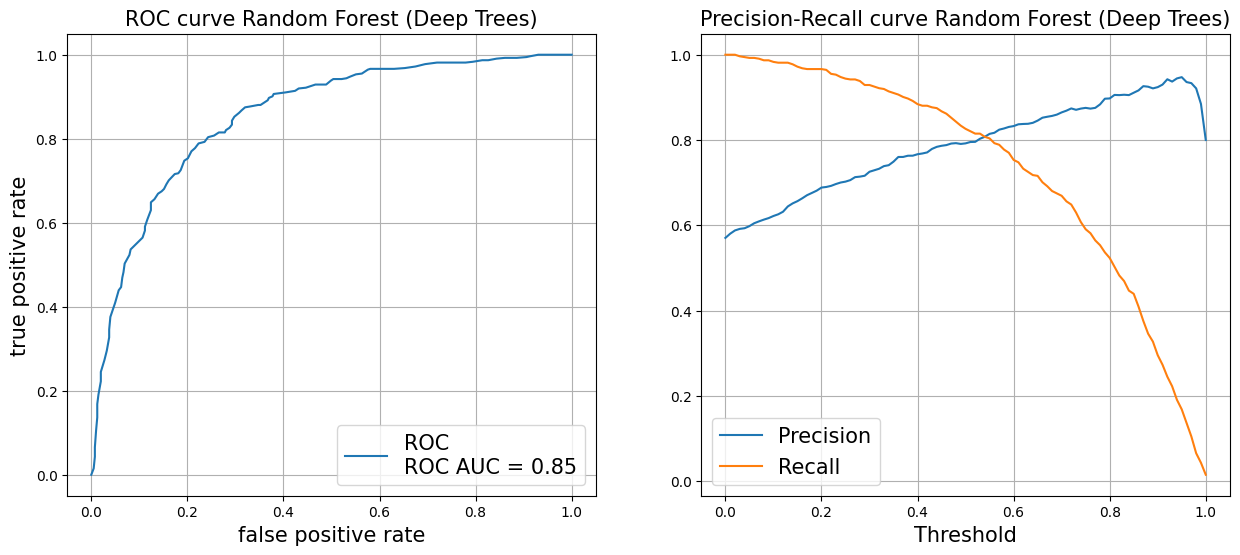

In [13]:
for (reg, clf_title) in zip(classifiers, classifier_titles):
    print(f"\n --- {reg} ---")
    reg.fit(X_train, y_train)
    reg_prediction = reg.predict(X_test)

    thresholded_prediction = np.where(reg_prediction > 0.5, 1, 0)
    precision = precision_score(y_test, thresholded_prediction)
    accuracy = accuracy_score(y_test, thresholded_prediction)
    recall = recall_score(y_test, thresholded_prediction)
    f1 = f1_score(y_test, thresholded_prediction)

    # a regressor result was used.
    # We can perceive predictions in this case as probability with some sort of assumptions
    logloss = log_loss(y_test, reg_prediction)
    roc_auc = roc_auc_score(y_test, reg_prediction)

    print(f"Precision: %.2f" % (precision))
    print(f"Recall: %.2f" % (recall))
    print(f"Accuracy: %.2f" % (accuracy))
    print(f"F1-score: %.2f" % (f1))
    print(f"Log-loss score: %.2f" % (logloss))
    print(f"ROC AUC: %.2f" % (roc_auc))

    # precision-recall curve
    prec, rec, thresh = precision_recall_curve(y_test, reg_prediction)
    # roc
    fpr, tpr, thr = roc_curve(y_test, reg_prediction)


    plt.figure(figsize=(15, 6))

    plt.subplot(121)
    plt.plot(fpr, tpr, label=f"ROC \nROC AUC = %.2f" % (roc_auc))
    plt.grid()
    plt.xlabel("false positive rate", fontsize = 15)
    plt.ylabel("true positive rate", fontsize = 15)
    plt.title(f"ROC curve {clf_title}", fontsize = 15)
    plt.legend(fontsize = 15)

    plt.subplot(122)
    plt.grid()
    plt.plot(thresh, prec[:-1], label="Precision")
    plt.plot(thresh, rec[:-1], label="Recall")
    plt.xlabel(u"Threshold", fontsize = 15)
    plt.title(f'Precision-Recall curve {clf_title}', fontsize = 15)


    plt.legend(fontsize = 15)
    plt.show()

    print("\n")

| Metrics   | Small Tree | Deep Tree | Random Forest (Small Trees) | Random Forest (deep Trees) |
|-----------|------------|-----------|-----------------------------|----------------------------|
| Precision | 0.79       | 0.75      | 0.79                        | 0.80                       |
| Recall    | 0.80       | 0.72      | 0.82                        | 0.83                       |
| Accuracy  | 0.76       | 0.70      | 0.77                        | 0.78                       |
| F1-score  | 0.79       | 0.73      | 0.81                        | 0.81                       |
| Log-loss  | 0.54       | 10.72     | 0.52                        | 0.47                       |
| ROC AUC   | 0.78       | 0.70      | 0.82                        | 0.86                       |

The table above shows that small trees were able to generalize the data better. This could be due to the importance of only one or two columns, which provide us with good predictions, while every other column may be similar and not important for the classification task

## Task 4

Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be not less than 0.95

The easiet way to do it is just to use a small threshold and the last regressor to get a high recall value... But I want to try logistic regression and gradient boosting (Scipy )

In [14]:
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X_train, y_train)
gbr_prediction = GBR.predict(X_test)

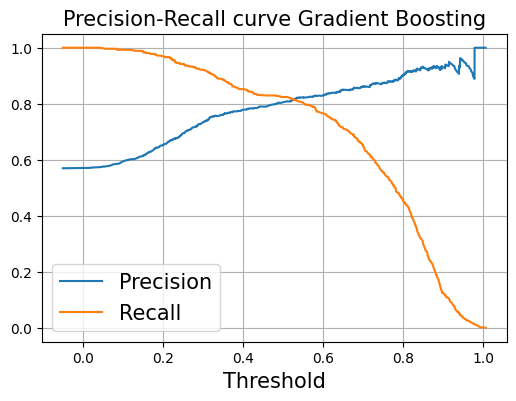

In [15]:
# precision-recall curve
prec, rec, thresh = precision_recall_curve(y_test, gbr_prediction)

plt.figure(figsize=(6, 4))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold", fontsize = 15)
plt.title(f'Precision-Recall curve Gradient Boosting', fontsize = 15)


plt.legend(fontsize = 15)

In [16]:
thresholded_prediction_gbr = np.where(gbr_prediction > 0.2, 1, 0)
precision_gbr = precision_score(y_test, thresholded_prediction_gbr)
accuracy_gbr = accuracy_score(y_test, thresholded_prediction_gbr)
recall_gbr = recall_score(y_test, thresholded_prediction_gbr)

logloss_gbr = log_loss(y_test, gbr_prediction)
roc_auc_gbr = roc_auc_score(y_test, gbr_prediction)
print(recall_gbr)

0.9700934579439252


Let's try catboost

In [ ]:
catboost_GBR = CatBoostRegressor(random_state=42)
catboost_GBR.fit(X_train, y_train)
catboost_gbr_prediction = catboost_GBR.predict(X_test)

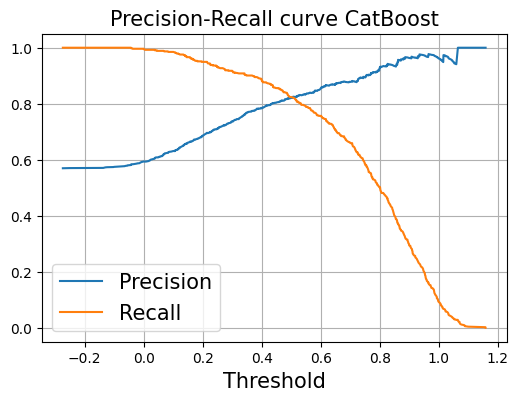

In [18]:
# precision-recall curve
prec, rec, thresh = precision_recall_curve(y_test, catboost_gbr_prediction)

plt.figure(figsize=(6, 4))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold", fontsize = 15)
plt.title(f'Precision-Recall curve CatBoost', fontsize = 15)


plt.legend(fontsize = 15)

In [19]:
thresholded_catboost_gbr_prediction = np.where(catboost_gbr_prediction > 0.2, 1, 0)
print(recall_gbr)

0.9700934579439252


It has worse quality than standart scipy gradient boosting. Let's stick to the scipy gradient boosting option

In [20]:
# scipy gradient boosting

precision_gbr = precision_score(y_test, thresholded_prediction_gbr)
accuracy_gbr = accuracy_score(y_test, thresholded_prediction_gbr)
recall_gbr = recall_score(y_test, thresholded_prediction_gbr)
f1 = f1_score(y_test, thresholded_prediction_gbr)


logloss_gbr = log_loss(y_test, gbr_prediction)
roc_auc_gbr = roc_auc_score(y_test, gbr_prediction)


print(f"Precision: %.2f" % (precision_gbr))
print(f"Recall: %.2f" % (recall_gbr))
print(f"Accuracy: %.2f" % (accuracy_gbr))
print(f"F1-score: %.2f" % (f1))
print(f"Log-loss score: %.2f" % (logloss_gbr))
print(f"ROC AUC: %.2f" % (roc_auc_gbr))

Precision: 0.65
Recall: 0.97
Accuracy: 0.69
F1-score: 0.78
Log-loss score: 0.48
ROC AUC: 0.85


The precision and F1-score are both low. It's important to note that these two metrics are dependent and in this task, I focused on maximizing the recall